# DATA EXPLORATION AND PRE PROCESSING

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Import all libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import WordCloud, STOPWORDS
import string
import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from gensim.models import Word2Vec, FastText
import warnings
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
warnings.filterwarnings('ignore')

In [3]:
#This function swaps 2 columns inside the dataframe
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [4]:
#This function removes punctuation from string
def remove_punctuations(text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
        
    return text

In [6]:
#Reading dataset
Email_dataset = pd.read_csv("/content/drive/MyDrive/Bracu/Spring2023/spam_ham_dataset.csv")

In [7]:
#Show dataset
Email_dataset.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [8]:
s=Email_dataset["label"].value_counts()
s

ham     3672
spam    1499
Name: label, dtype: int64

In [10]:
#Dropping columns that are not needed
Email_dataset = Email_dataset.drop('Unnamed: 0', axis=1)
Email_dataset = Email_dataset.drop('label', axis=1)

In [11]:
Email_dataset.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [14]:
#Renaming the dataframe columns
Email_dataset.columns = ["Email_text" , "Labels"]

In [15]:
Email_dataset.head()

,Email_text,Labels
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [ ]:
#Converting all strings to lowercase
Email_dataset['Email_text'] = Email_dataset['Email_text'].str.lower()

In [ ]:
#Removing Punctuation from the data
Email_dataset['Email_text'] = Email_dataset['Email_text'].apply(remove_punctuations)

In [ ]:
Email_dataset.head()

,Email_text,Email_Subject,Labels
0,subject enron methanol meter 988291\r\nthis...,enron methanol meter 988291,0
1,subject hpl nom for january 9 2001\r\n see at...,hpl nom for january 9 2001,0
2,subject neon retreat\r\nho ho ho we re aroun...,neon retreat,0
3,subject photoshop windows office cheap mai...,photoshop windows office cheap main trending,1
4,subject re indian springs\r\nthis deal is to ...,re indian springs,0


In [18]:
#creating stopwords corpus
more_stopwords = {'re' , 's' , 'subject','hpl','hou','enron'}
STOPWORDS = STOPWORDS.union(more_stopwords)

In [19]:
Email_dataset.head()

,Email_text,Labels
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [21]:
#split email dataset 
X_train, X_test , y_train, y_test = train_test_split(Email_dataset['Email_text'], Email_dataset['Labels'] , test_size=0.2, random_state = 42)

In [22]:
#vectorize our training dataset 
Vectorizer = CountVectorizer()
count= Vectorizer.fit_transform(X_train.values)

#Naive Bayes

In [23]:
#fit the dataset on multinomial naive bayes 
model_NB = MultinomialNB()
targets = y_train.values
model_NB.fit(count, targets)

MultinomialNB()

In [24]:
#make predictions 
y_predict = model_NB.predict(Vectorizer.transform(X_test))

In [25]:
#test accuracy 
accuracy_score(y_test, y_predict)

0.9719806763285024

In [26]:
#print the classification report 
print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       742
           1       0.96      0.95      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



#LOGISTIC REGRESSION


In [28]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_LR = LogisticRegression()
targets = y_train.values
model_LR.fit(count, targets)

In [32]:
y_predict = model_LR.predict(Vectorizer.transform(X_test))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test , y_predict))

0.9806763285024155
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.97      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035



#RANDOM FOREST

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
model_RF = RandomForestClassifier(n_estimators = 200)
targets = y_train.values
model_RF.fit(count, targets)

RandomForestClassifier(n_estimators=200)

In [37]:
y_predict = model_RF.predict(Vectorizer.transform(X_test))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test , y_predict))

0.9739130434782609
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       742
           1       0.97      0.94      0.95       293

    accuracy                           0.97      1035
   macro avg       0.97      0.96      0.97      1035
weighted avg       0.97      0.97      0.97      1035



#ENSEMBLE OF SUPERVISED MODEL

In [39]:
from sklearn.ensemble import VotingClassifier

In [41]:
model_ens = VotingClassifier(estimators = [('Naive Bayes', model_NB), ('Logistic Regression', model_LR), ('Random Forest', model_RF)])
targets = y_train.values
model_ens.fit(count, targets)

VotingClassifier(estimators=[('Naive Bayes', MultinomialNB()),
                             ('Logistic Regression', LogisticRegression()),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=200))])

In [42]:
y_predict = model_ens.predict(Vectorizer.transform(X_test))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test , y_predict))

0.9874396135265701
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.98      0.98       293

    accuracy                           0.99      1035
   macro avg       0.98      0.99      0.98      1035
weighted avg       0.99      0.99      0.99      1035



#BiLSTM

In [43]:
import tensorflow as tf
from keras import layers
from keras.models import Sequential
from keras.utils import pad_sequences
from keras.layers import LSTM, GRU
from keras.layers import Dense, Activation, Dropout
from keras.layers import Embedding
from sklearn import preprocessing, decomposition, model_selection, metrics, pipeline
from keras.layers import Flatten, Bidirectional, SpatialDropout1D
from keras.preprocessing import sequence, text
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from sklearn.utils import resample

In [44]:
Y = pd.get_dummies(Email_dataset['Labels']).values
print("Shape of label tensor:", Y.shape)

Shape of label tensor: (5171, 2)


In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(Email_dataset['Email_text'], Y, train_size=.8, random_state=42, shuffle = True)

In [46]:
maxlen = 800
tokenizer = Tokenizer()
tokenizer.fit_on_texts(Email_dataset['Email_text'])

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1  

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)

X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [47]:
def create_embedding_matrix(filepath, word_idx, embedding_dim):
    vocab_size = len(word_idx) + 1  
    emb = np.zeros((vocab_size, embedding_dim))
    with open(filepath, 'r', encoding="utf8") as f:
        for i in f:
            x = i.split(' ')
            w, v = x[0], x[1:]
            if w in word_idx:
                emb[word_idx[w]] = np.asarray(v)[:embedding_dim]
    return emb

In [48]:
embedding_dim = 300
embedding_matrix = create_embedding_matrix('/content/drive/MyDrive/Bracu/Spring2022/CSE440/Project/Dataset/glove.840B.300d.txt', tokenizer.word_index, embedding_dim)


In [49]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                          weights=[embedding_matrix], 
                          input_length=maxlen, 
                          trainable=False))
model.add(Bidirectional(LSTM(300,activation='tanh', dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(150,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 800, 300)          17361600  
                                                                 
 bidirectional (Bidirectiona  (None, 600)              1442400   
 l)                                                              
                                                                 
 dense (Dense)               (None, 150)               90150     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 302       
                                                                 
Total params: 18,894,452
Trainable params: 1,532,852
Non-trainable params: 17,361,600
____________________________________

In [53]:
epochs = 20
batch_size = 64
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])


Epoch 1/20
59/59 [==============================] - 410s 7s/step - loss: 0.2227 - accuracy: 0.9105 - val_loss: 0.0972 - val_accuracy: 0.9638
Epoch 2/20
59/59 [==============================] - 406s 7s/step - loss: 0.1216 - accuracy: 0.9538 - val_loss: 0.1270 - val_accuracy: 0.9541
Epoch 3/20
59/59 [==============================] - 407s 7s/step - loss: 0.0981 - accuracy: 0.9643 - val_loss: 0.0758 - val_accuracy: 0.9758
Epoch 4/20
59/59 [==============================] - 404s 7s/step - loss: 0.0775 - accuracy: 0.9723 - val_loss: 0.1488 - val_accuracy: 0.9372
Epoch 5/20
59/59 [==============================] - 405s 7s/step - loss: 0.0824 - accuracy: 0.9691 - val_loss: 0.1561 - val_accuracy: 0.9541


In [54]:
classes_a = ['Not Spam', 'Spam']

def evaluate_model_binary(model, X, y):
    y_pred = model.predict(X)
    y_pred_binary = np.argmax(y_pred, axis=1) # Convert to binary predictions
    
    # Convert y from one-hot encoding to binary encoding
    y_binary = np.argmax(y, axis=1)

    # Create a confusion matrix and classification report for the binary predictions
    cm_binary = confusion_matrix(y_binary, y_pred_binary)
    cr_binary = classification_report(y_binary, y_pred_binary, target_names=classes_a, zero_division = 0)

    print('Classification Report (Binary):\n', cr_binary)

    # Create heatmap
    sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', xticklabels=classes_a, yticklabels=classes_a)

    # Add axis labels and title
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix (Binary)')

    # Show plot|
    plt.show()

def plot_model_history(history, model_name):
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title(f'{model_name} Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

33/33 [==============================] - 18s 527ms/step
Classification Report (Binary):
               precision    recall  f1-score   support

    Not Spam       0.97      0.98      0.98       742
        Spam       0.95      0.93      0.94       293

    accuracy                           0.97      1035
   macro avg       0.96      0.96      0.96      1035
weighted avg       0.97      0.97      0.97      1035



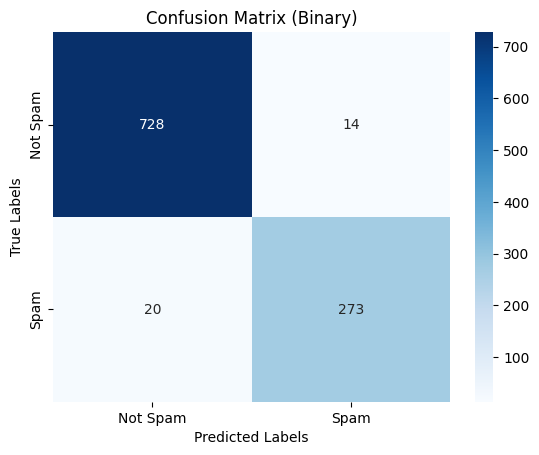

In [55]:
evaluate_model_binary(model, X_test, Y_test)

#ENSEMBLE OF ELECTRA TRANSFORMERS

In [56]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 84.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 105.9 MB/s eta 0:00:00


In [57]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 101.7 MB/s eta 0:00:00


In [58]:
from keras.layers import concatenate, Flatten

In [59]:
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, GRU, Dense, Dropout, TimeDistributed
from transformers import ElectraTokenizer, TFElectraModel


In [60]:
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import GlobalMaxPool1D, Input
from keras.models import Model

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(Email_dataset['Email_text'], Email_dataset['Labels'], train_size=.8, random_state=42, shuffle = True)

Loading the Bert preprocessing and electra Electra Encoder

In [62]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
electra_encoder = hub.KerasLayer("https://tfhub.dev/google/electra_large/2")


In [63]:
# Electra layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = electra_encoder(preprocessed_text)

# GRU layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(outputs['sequence_output'])
gru1 = Bidirectional(GRU(300,activation='tanh', dropout=0.2, recurrent_dropout=0.2)) (l)
gru2 = Dense(300,activation = 'relu')(gru1)

# CNN Layers
cnn1 = Conv1D(128,8,activation = 'relu' )(l)
cnn2 = MaxPooling1D(2)(cnn1)
cnn3 = Dropout(0.3)(cnn2)
cnn4 = Dense(32, activation = "relu")(cnn3)
cnn5 = Flatten()(cnn4)

merge = concatenate([cnn5,gru2])
dense1 = Dense(16, activation = 'relu')(merge)
l = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(dense1)
model = tf.keras.Model(inputs=[text_input], outputs = [l])

In [64]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [65]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [66]:
epochs = 10
batch_size = 512 #*tpu_strategy.num_replicas_in_sync
for i in range(epochs):
  history = model.fit(X_train, Y_train, epochs=1, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=2, min_delta=0.0001)])
  accr = model.evaluate(X_test,Y_test) 
  print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))
  if accr[1] >= 0.980:
    break

33/33 [==============================] - 38s 1s/step - loss: 0.4682 - accuracy: 0.7671 - precision: 1.0000 - recall: 0.1775
Test set
  Loss: 0.468
  Accuracy: 0.767
33/33 [==============================] - 39s 1s/step - loss: 0.2586 - accuracy: 0.8850 - precision: 0.9307 - recall: 0.6416
Test set
  Loss: 0.259
  Accuracy: 0.885
33/33 [==============================] - 38s 1s/step - loss: 0.1358 - accuracy: 0.9498 - precision: 0.8731 - recall: 0.9625
Test set
  Loss: 0.136
  Accuracy: 0.950
33/33 [==============================] - 38s 1s/step - loss: 0.1606 - accuracy: 0.9430 - precision: 0.9466 - recall: 0.8464
Test set
  Loss: 0.161
  Accuracy: 0.943
33/33 [==============================] - 38s 1s/step - loss: 0.0685 - accuracy: 0.9739 - precision: 0.9463 - recall: 0.9625
Test set
  Loss: 0.069
  Accuracy: 0.974
33/33 [==============================] - 37s 1s/step - loss: 0.0622 - accuracy: 0.9729 - precision: 0.9373 - recall: 0.9693
Test set
  Loss: 0.062
  Accuracy: 0.973
33/33 [===

In [67]:
y_predicted = model.predict(X_test)

33/33 [==============================] - 38s 1s/step


In [68]:
y_predicted = y_predicted.flatten()
y_predicted = np.where(y_predicted > 0.5, 1, 0)
print(classification_report(Y_test, y_predicted))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       742
           1       0.97      0.97      0.97       293

    accuracy                           0.98      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.98      0.98      0.98      1035

